### Prepare the data

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [3]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [5]:
print(X_train.shape, X_test.shape)

(120, 4) (30, 4)


### Train Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### predictions

In [7]:
y_pred = model.predict(X_test)
print(y_pred[:5])
print(y_test[:5])

[1 0 2 1 1]
[1 0 2 1 1]


### Evaluate

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 1.00
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


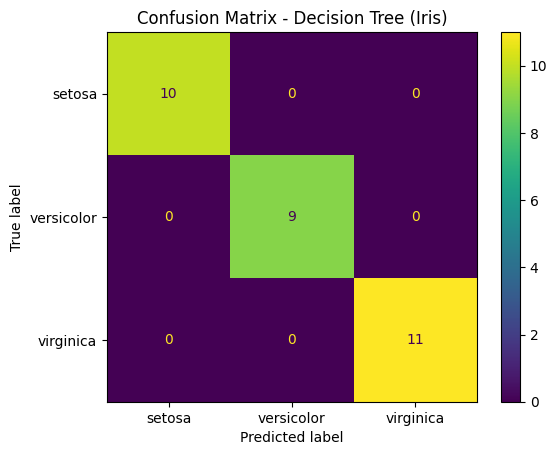

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [9]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.title("Confusion Matrix - Decision Tree (Iris)")
plt.show()

print(classification_report(y_test, y_pred, target_names=iris.target_names))

### Interpreting the model

In [10]:
for name, importance in zip(iris.feature_names, model.feature_importances_):
    print(f"{name}: {importance:.3f}")

sepal length (cm): 0.000
sepal width (cm): 0.017
petal length (cm): 0.906
petal width (cm): 0.077


### Visualise the tree

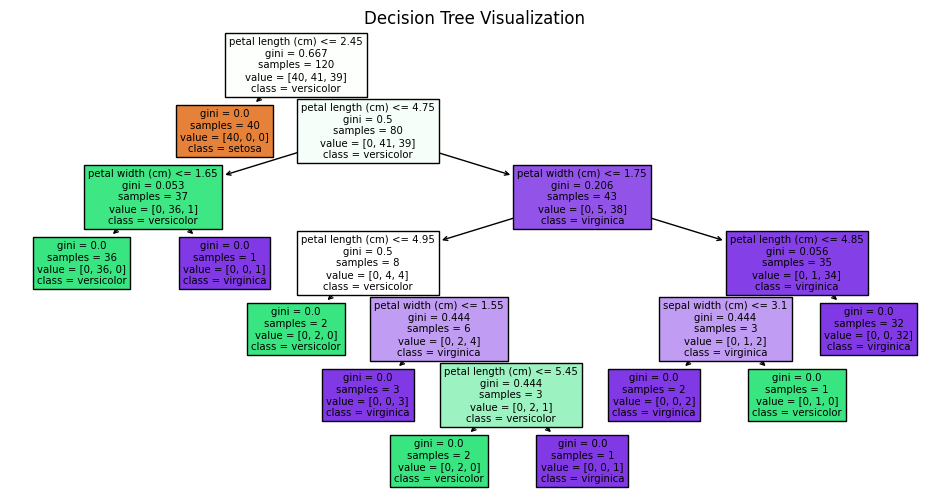

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()